In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3b3e52dad7ac23ffd0a734ec11eff9e


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | maceio
Processing Record 5 of Set 1 | suez
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | nome
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | khilok
Processing Record 11 of Set 1 | mehamn
Processing Record 12 of Set 1 | oriximina
Processing Record 13 of Set 1 | honiara
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | nicoya
Processing Record 16 of Set 1 | wakkanai
Processing Record 17 of Set 1 | shimoda
Processing Record 18 of Set 1 | cassilandia
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | samusu
City not found. Skipping...
Processing Record 21 of Set 1 | port elizabeth
Processing R

Processing Record 37 of Set 4 | kahului
Processing Record 38 of Set 4 | polczyn-zdroj
Processing Record 39 of Set 4 | nakusp
Processing Record 40 of Set 4 | broken hill
Processing Record 41 of Set 4 | los llanos de aridane
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | amberley
Processing Record 44 of Set 4 | acarau
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | ostersund
Processing Record 47 of Set 4 | avarua
Processing Record 48 of Set 4 | beloha
Processing Record 49 of Set 4 | saint-leu
Processing Record 50 of Set 4 | namatanai
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | kulhudhuffushi
Processing Record 3 of Set 5 | avera
Processing Record 4 of Set 5 | santa maria
Processing Record 5 of Set 5 | laguna de perlas
Processing Record 6 of Set 5 | turukhansk
Processing Record 7 of Set 5 | gladstone
Processing Record 8 of Set 5 | komsomolskiy
Processing Record 9 of Set 5 | umm lajj
Processing Record 1

Processing Record 28 of Set 8 | saint anthony
Processing Record 29 of Set 8 | cotonou
Processing Record 30 of Set 8 | arawa
Processing Record 31 of Set 8 | khromtau
Processing Record 32 of Set 8 | dickinson
Processing Record 33 of Set 8 | ambovombe
Processing Record 34 of Set 8 | tarko-sale
Processing Record 35 of Set 8 | kamenka
Processing Record 36 of Set 8 | calderitas
Processing Record 37 of Set 8 | zhezkazgan
Processing Record 38 of Set 8 | mporokoso
Processing Record 39 of Set 8 | san juan del sur
Processing Record 40 of Set 8 | meulaboh
Processing Record 41 of Set 8 | ketchikan
Processing Record 42 of Set 8 | oktyabrskiy
Processing Record 43 of Set 8 | narodychi
Processing Record 44 of Set 8 | tiarei
Processing Record 45 of Set 8 | wenatchee
Processing Record 46 of Set 8 | eureka
Processing Record 47 of Set 8 | arenapolis
Processing Record 48 of Set 8 | bonoua
Processing Record 49 of Set 8 | sur
Processing Record 50 of Set 8 | canto do buriti
Processing Record 1 of Set 9 | hovd


Processing Record 15 of Set 12 | williams lake
Processing Record 16 of Set 12 | kieta
Processing Record 17 of Set 12 | bathsheba
Processing Record 18 of Set 12 | ulety
Processing Record 19 of Set 12 | djibo
Processing Record 20 of Set 12 | charters towers
Processing Record 21 of Set 12 | general roca
Processing Record 22 of Set 12 | the valley
Processing Record 23 of Set 12 | saint-pierre
Processing Record 24 of Set 12 | varzea grande
Processing Record 25 of Set 12 | miri
Processing Record 26 of Set 12 | taoudenni
Processing Record 27 of Set 12 | hofn
Processing Record 28 of Set 12 | altagracia de orituco
Processing Record 29 of Set 12 | necochea
Processing Record 30 of Set 12 | atambua
Processing Record 31 of Set 12 | hohhot
Processing Record 32 of Set 12 | basco
Processing Record 33 of Set 12 | pangnirtung
Processing Record 34 of Set 12 | zermatt
Processing Record 35 of Set 12 | namibe
Processing Record 36 of Set 12 | kindu
Processing Record 37 of Set 12 | chicama
Processing Record 3

In [7]:
len(city_data)

559

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.5744,150.7967,82.17,74,86,13.42,PG,2022-04-19 17:14:25
1,Ushuaia,-54.8000,-68.3000,53.22,58,53,7.05,AR,2022-04-19 17:11:04
2,Maceio,-9.6658,-35.7353,87.24,58,75,11.50,BR,2022-04-19 17:12:06
3,Suez,29.9737,32.5263,67.44,54,2,20.62,EG,2022-04-19 17:12:25
4,Mount Isa,-20.7333,139.5000,73.17,27,19,12.66,AU,2022-04-19 17:14:26
5,Chuy,-33.6971,-53.4616,76.01,49,0,7.09,UY,2022-04-19 17:14:26
6,Nome,64.5011,-165.4064,30.27,55,0,13.80,US,2022-04-19 17:14:27
7,Bredasdorp,-34.5322,20.0403,62.53,90,0,8.63,ZA,2022-04-19 17:14:27
8,Khilok,51.3674,110.4676,34.68,75,100,11.16,RU,2022-04-19 17:14:27
9,Mehamn,71.0357,27.8492,37.35,87,75,5.75,NO,2022-04-19 17:14:28


In [9]:
columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavieng,PG,2022-04-19 17:14:25,-2.5744,150.7967,82.17,74,86,13.42
1,Ushuaia,AR,2022-04-19 17:11:04,-54.8000,-68.3000,53.22,58,53,7.05
2,Maceio,BR,2022-04-19 17:12:06,-9.6658,-35.7353,87.24,58,75,11.50
3,Suez,EG,2022-04-19 17:12:25,29.9737,32.5263,67.44,54,2,20.62
4,Mount Isa,AU,2022-04-19 17:14:26,-20.7333,139.5000,73.17,27,19,12.66
5,Chuy,UY,2022-04-19 17:14:26,-33.6971,-53.4616,76.01,49,0,7.09
6,Nome,US,2022-04-19 17:14:27,64.5011,-165.4064,30.27,55,0,13.80
7,Bredasdorp,ZA,2022-04-19 17:14:27,-34.5322,20.0403,62.53,90,0,8.63
8,Khilok,RU,2022-04-19 17:14:27,51.3674,110.4676,34.68,75,100,11.16
9,Mehamn,NO,2022-04-19 17:14:28,71.0357,27.8492,37.35,87,75,5.75


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1650390669.2136524

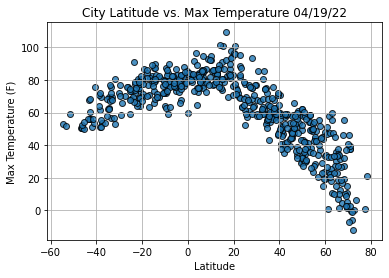

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

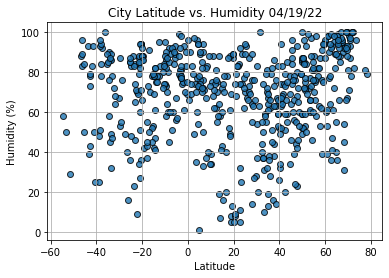

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

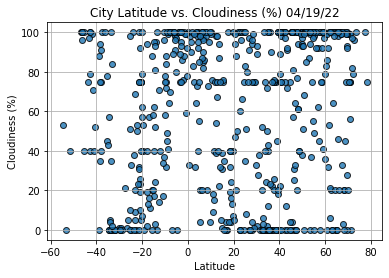

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

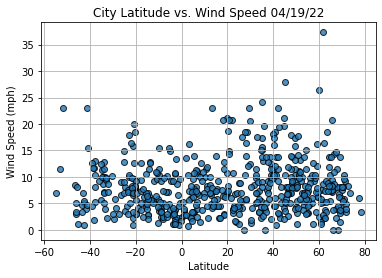

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()